In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../input/daily-total-female-births-in-california-1959/daily-total-female-births-CA.csv')
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


### Time series Plot

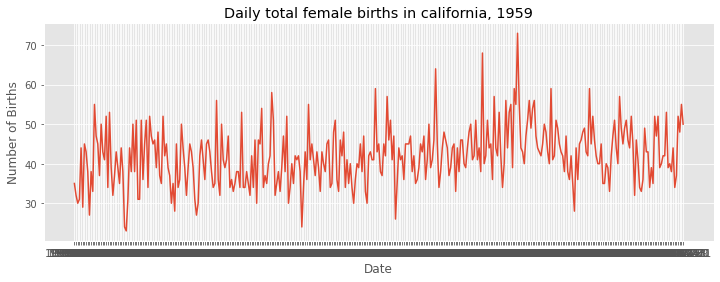

In [3]:
x , y = df.date , df.births
fig = plt.figure(figsize=(12,4))
plt.plot(x, y);
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.title('Daily total female births in california, 1959')
plt.show()

### Ljung–Box test, Correlation test

In [4]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

# lags is suggested to be the log(len(y))
acorr_ljungbox(y, lags=6, return_df =True)


,lb_stat,lb_pvalue
1,17.367682,3.080192e-05
2,25.992300,2.269048e-06
3,30.325469,1.178756e-06
4,33.375391,1.000684e-06
5,36.801412,6.564334e-07
6,39.894057,4.778802e-07


- Since all p-value numbers are significant we cannot reject the null hypothesis of no auto-correlation between the series, thus there is definitely an autocorrelation 

### Differenced time series, to remove the trend
- because ACF & PACF works with stationary time *series*

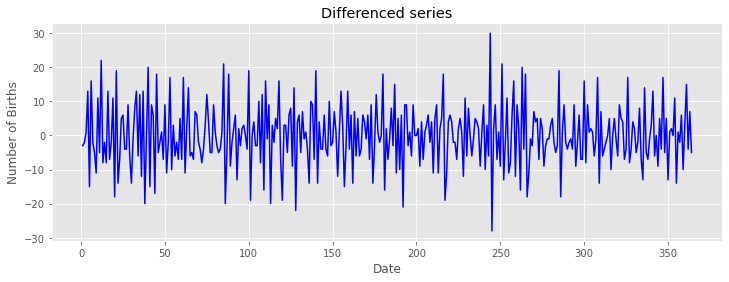

In [5]:
from statsmodels.tsa.statespace.tools import diff

fig = plt.figure(figsize=(12,4))
plt.plot(diff(y),color='b');
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.title('Differenced series')
plt.show()

### ACF & PACF

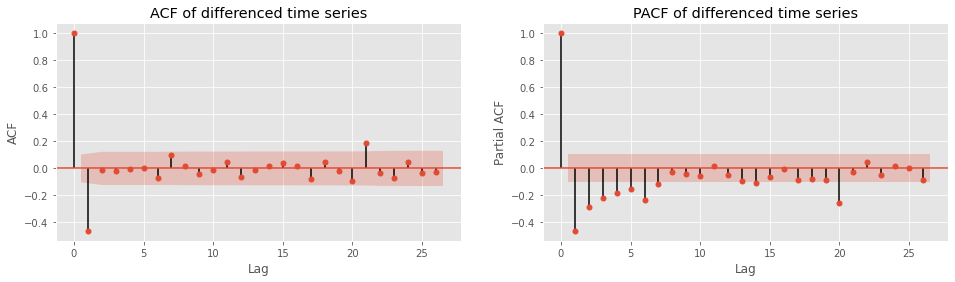

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(16,4))
ax1 = plt.subplot(1,2,1)
plot_acf(diff(y), title='ACF of differenced time series',ax=ax1 )
plt.xlabel('Lag')
plt.ylabel('ACF')
ax2 = plt.subplot(1,2,2)
plot_pacf(diff(y), title='PACF of differenced time series',ax=ax2)
plt.xlabel('Lag')
plt.ylabel('Partial ACF')
plt.show()

- ACF denotes that the order of moving average process of q
  - ACF -> There are 1 or 2 significant lags 
- PACF dentoes that the order of autoregressive process of p
  - PACF -> There are 7 significant lags 

### ARIMA Model

#### ARIMA (0,1,1)

In [7]:
from statsmodels.tsa.arima_model import ARIMA

model1 = ARIMA(y, order=(0,1,1))
model1_fit = model1.fit(disp=0)
print(model1_fit.summary())

residuals = pd.DataFrame(model1_fit.resid)

model1_sse = sum((residuals**2).values)
model1_aic = model1_fit.aic


                             ARIMA Model Results                              
Dep. Variable:               D.births   No. Observations:                  364
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1228.792
Method:                       css-mle   S.D. of innovations              7.054
Date:                Mon, 07 Sep 2020   AIC                           2463.584
Time:                        08:09:00   BIC                           2475.275
Sample:                             1   HQIC                          2468.231
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0154      0.019      0.823      0.410      -0.021       0.052
ma.L1.D.births    -0.9525      0.023    -42.029      0.000      -0.997      -0.908
                                    

#### ARIMA (0,1,2)

In [8]:
model2 = ARIMA(y, order=(0,1,2))
model2_fit = model2.fit(disp=0)
print(model2_fit.summary())

residuals = pd.DataFrame(model2_fit.resid)

model2_sse = sum((residuals**2).values)
model2_aic = model2_fit.aic

                             ARIMA Model Results                              
Dep. Variable:               D.births   No. Observations:                  364
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1226.361
Method:                       css-mle   S.D. of innovations              7.006
Date:                Mon, 07 Sep 2020   AIC                           2460.722
Time:                        08:09:00   BIC                           2476.311
Sample:                             1   HQIC                          2466.918
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0150      0.015      1.001      0.317      -0.014       0.044
ma.L1.D.births    -0.8511      0.050    -17.144      0.000      -0.948      -0.754
ma.L2.D.births    -0.1113      0.050

#### ARIMA (7,1,1)

In [9]:
model3 = ARIMA(y, order=(7,1,1))
model3_fit = model3.fit(disp=0)
print(model3_fit.summary())

residuals = pd.DataFrame(model3_fit.resid)

model3_sse = sum((residuals**2).values)
model3_aic = model3_fit.aic

                             ARIMA Model Results                              
Dep. Variable:               D.births   No. Observations:                  364
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -1221.912
Method:                       css-mle   S.D. of innovations              6.896
Date:                Mon, 07 Sep 2020   AIC                           2463.824
Time:                        08:09:02   BIC                           2502.796
Sample:                             1   HQIC                          2479.314
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0197      0.006      3.568      0.000       0.009       0.030
ar.L1.D.births     0.1436      0.052      2.763      0.006       0.042       0.245
ar.L2.D.births     0.0631      0.053

#### ARIMA (7,1,2)

In [10]:
model4 = ARIMA(y, order=(7,1,2))
model4_fit = model4.fit(disp=0)
print(model4_fit.summary())

residuals = pd.DataFrame(model4_fit.resid)

model4_sse = sum((residuals**2).values)
model4_aic = model4_fit.aic

                             ARIMA Model Results                              
Dep. Variable:               D.births   No. Observations:                  364
Model:                 ARIMA(7, 1, 2)   Log Likelihood               -1221.736
Method:                       css-mle   S.D. of innovations              6.893
Date:                Mon, 07 Sep 2020   AIC                           2465.472
Time:                        08:09:05   BIC                           2508.341
Sample:                             1   HQIC                          2482.510
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0197      0.006      3.478      0.001       0.009       0.031
ar.L1.D.births     0.3047      0.265      1.150      0.250      -0.214       0.824
ar.L2.D.births     0.0395      0.066

### Results comparision

In [11]:
results_df = pd.DataFrame({
    'Arima(0,1,1)': [model1_aic, "{:.3f}".format(model1_sse[0])], 
    'Arima(0,1,2)': [model2_aic, "{:.3f}".format(model2_sse[0])],
    'Arima(7,1,1)': [model3_aic, "{:.3f}".format(model3_sse[0])],
    'Arima(7,1,2)': [model4_aic, "{:.3f}".format(model4_sse[0])]
}, index=['AIC', 'SSE'])

results_df.head()

,"Arima(0,1,1)","Arima(0,1,2)","Arima(7,1,1)","Arima(7,1,2)"
AIC,2463.58,2460.72,2463.82,2465.47
SSE,18209.367,17980.551,17557.891,17539.463


- Thus, it is better to stick with a smaller model Arima(0,1,2) 
- The fitted ARIMA model is:
\begin{align}
X_{t} = X_{t-1} + 0.015 + Z_{t} - 0.8511 Z_{t-1} - 0.1113Z_{t-2} \\
\end{align}

### Setting index & frequency for time series

In [12]:
df_comp = df.copy()
df_comp.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [13]:
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('d')
df_comp.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


### Seasonal decomposition

#### Additive or multiplicative?

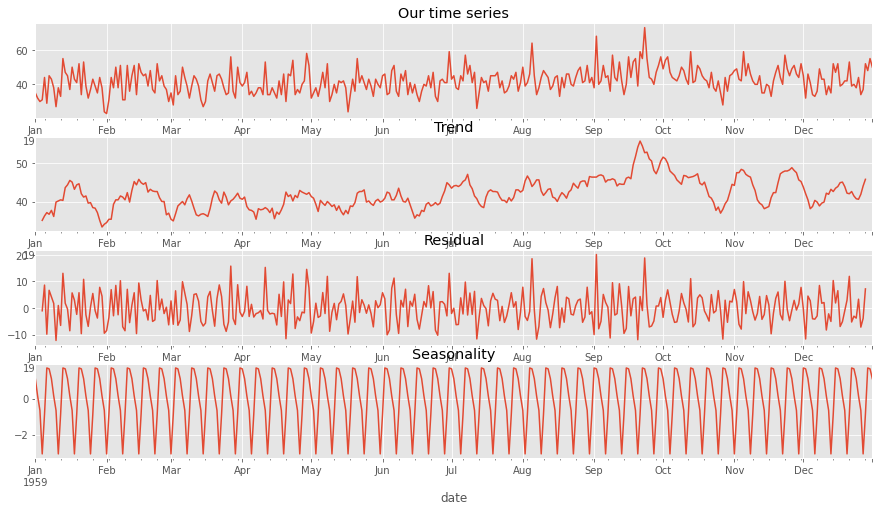

In [14]:
# Import
from statsmodels.tsa.seasonal import seasonal_decompose# Decompose time series into daily trend, seasonal, and residual components.

decomp = seasonal_decompose(df_comp, model = 'additive')# Plot the decomposed time series to interpret.

fig, (ax0, ax1,ax2,ax3) = plt.subplots(4,1, figsize=(15,8));
decomp.observed.plot(ax=ax0, title='Our time series');
decomp.trend.plot(ax=ax1, title='Trend');
decomp.resid.plot(ax=ax2, title='Residual');
decomp.seasonal.plot(ax=ax3, title='Seasonality');

- From the trend plot we can say there is an upward trend overal
- From the seasonality plot we can say there is definitely a seasonality causing the female births to fluctuate over the period
- We can see from the residual plot that there appears to be randomness in the data

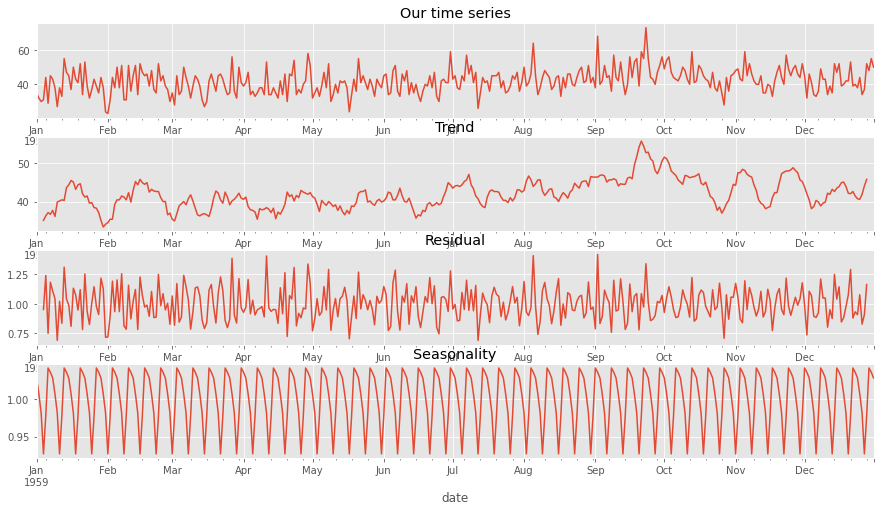

In [15]:
decomp = seasonal_decompose(df_comp, model = 'multiplicative')# Plot the decomposed time series to interpret.

fig, (ax0, ax1,ax2,ax3) = plt.subplots(4,1, figsize=(15,8));
decomp.observed.plot(ax=ax0, title='Our time series');
decomp.trend.plot(ax=ax1, title='Trend');
decomp.resid.plot(ax=ax2, title='Residual');
decomp.seasonal.plot(ax=ax3, title='Seasonality');

- We can also say the same things for the multiplicative one, with some changes in the y-axis of seasonality and residual plots

### SARIMA

In [16]:
import itertools

q = [1,2]
p = [1,7]
d = [0,1]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (1, 0, 2) x (1, 0, 2, 12)
SARIMAX: (1, 0, 2) x (1, 1, 1, 12)
SARIMAX: (1, 1, 1) x (1, 1, 2, 12)
SARIMAX: (1, 1, 1) x (7, 0, 1, 12)


In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

rest_dict = {}

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(diff(y),order=param,seasonal_order=param_seasonal)
            results = mod.fit(maxiter=100, method='powell')
#             print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic)) 
            rest_dict[param] = {param_seasonal: results.aic}
        except: 
            continue
print(rest_dict)

Optimization terminated successfully.
         Current function value: 3.363076
         Iterations: 3
         Function evaluations: 175
Optimization terminated successfully.
         Current function value: 3.363068
         Iterations: 3
         Function evaluations: 204
Optimization terminated successfully.
         Current function value: 3.314999
         Iterations: 4
         Function evaluations: 241
Optimization terminated successfully.
         Current function value: 3.318707
         Iterations: 4
         Function evaluations: 282
Optimization terminated successfully.
         Current function value: 3.360507
         Iterations: 3
         Function evaluations: 373
Optimization terminated successfully.
         Current function value: 3.360528
         Iterations: 3
         Function evaluations: 403
Optimization terminated successfully.
         Current function value: 3.330291
         Iterations: 4
         Function evaluations: 512
Optimization terminated successful

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 3.365676
         Iterations: 2
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 3.365652
         Iterations: 2
         Function evaluations: 165
Optimization terminated successfully.
         Current function value: 3.318486
         Iterations: 4
         Function evaluations: 284
Optimization terminated successfully.
         Current function value: 3.322783
         Iterations: 4
         Function evaluations: 337
Optimization terminated successfully.
         Current function value: 3.363330
         Iterations: 3
         Function evaluations: 412
Optimization terminated successfully.
         Current function value: 3.363343
         Iterations: 3
         Function evaluations: 448
Optimization terminated successfully.
         Current function value: 3.334399
         Iterations: 4
         Function evaluations: 561
Optimization terminated successful

- Due to parsimonious principle in time series, I choose this model {(1, 0, 1): {(7, 1, 2, 12)} as my best model

### Best model

In [18]:
mod =  SARIMAX(diff(y),
               order=(1, 0, 1),
               seasonal_order=(7, 1, 2, 12))

results = mod.fit(maxiter=100, method='powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 3.330387
         Iterations: 4
         Function evaluations: 547
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1169      0.063      1.843      0.065      -0.007       0.241
ma.L1         -0.9508      0.022    -43.478      0.000      -0.994      -0.908
ar.S.L12      -1.0473      1.104     -0.949      0.343      -3.211       1.117
ar.S.L24      -0.9121      0.698     -1.307      0.191      -2.280       0.456
ar.S.L36      -0.7330      0.587     -1.249      0.212      -1.883       0.417
ar.S.L48      -0.6038      0.450     -1.341      0.180      -1.486       0.279
ar.S.L60      -0.4057      0.368     -1.103      0.270      -1.127       0.315
ar.S.L72      -0.2612      0.216     -1.208      0.227      -0.685       0.163
ar.S.L84      -0.1117      0.113     -0.991      0.322      -0.333      

### Results visualization

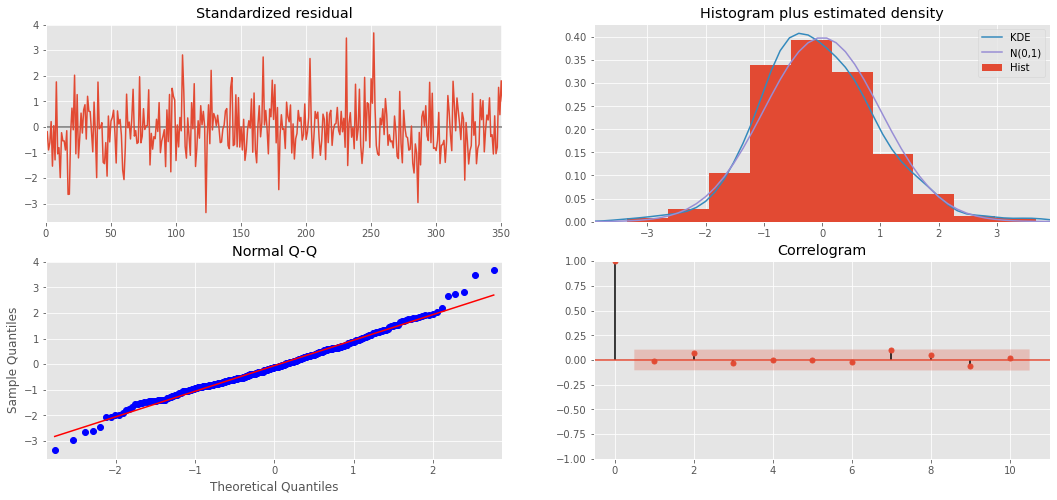

In [19]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

- My insights are
 - Data is stationary and the AR parameters are chosen correctly
 - Needless to say, residual indeed is the difference between true and predicted value. If there are correlations between residuals there is information left. Thus, there is no correlation between residuals and we can say everything is fine